# Chun Prediction Using Decision Tree

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,recall_score,f1_score

In [12]:
travel_df=pd.read_csv(r'C:\Users\MOTIRAM SINGH\Desktop\example file\Customertravel.csv')

In [4]:
travel_df.shape

(954, 7)

In [5]:
travel_df=travel_df.drop_duplicates()

In [15]:
pd.set_option('display.max_rows',5000)

In [16]:
travel_df

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
5,27,Yes,High Income,1,No,Yes,1
6,34,No,Middle Income,4,Yes,Yes,0
7,34,No,Low Income,2,Yes,No,1
8,30,No,Low Income,3,No,Yes,0
9,36,Yes,High Income,1,No,No,1


### Analysis of data in the dataframe

In [7]:
travel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 950
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         447 non-null    int64 
 1   FrequentFlyer               447 non-null    object
 2   AnnualIncomeClass           447 non-null    object
 3   ServicesOpted               447 non-null    int64 
 4   AccountSyncedToSocialMedia  447 non-null    object
 5   BookedHotelOrNot            447 non-null    object
 6   Target                      447 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 27.9+ KB


In [14]:
travel_df.shape

(954, 7)

In [17]:
travel_df.corr()

,Age,ServicesOpted,Target
Age,1.000000,-0.012422,-0.131534
ServicesOpted,-0.012422,1.000000,0.038646
Target,-0.131534,0.038646,1.000000


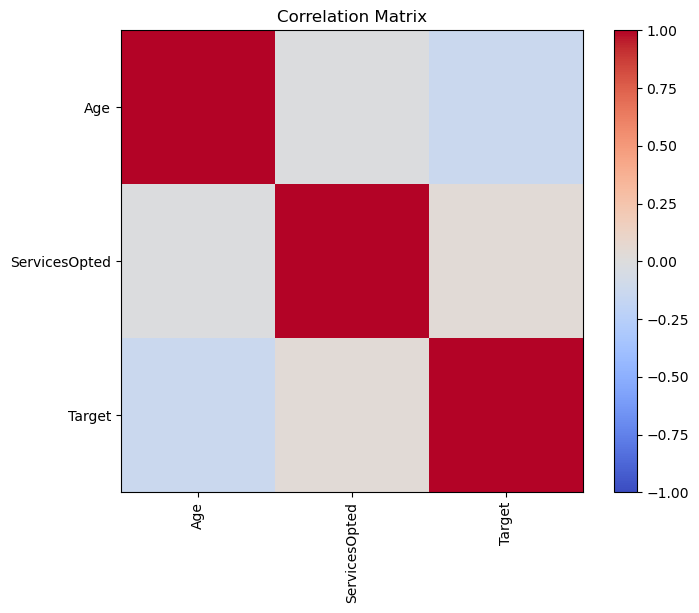

In [18]:
correlation_matrix = travel_df.corr()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap using the correlation matrix
heatmap = ax.imshow(correlation_matrix, cmap='coolwarm',vmin=-1,vmax=1)

# Set the x-axis and y-axis labels
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

# Add a colorbar legend
cbar = plt.colorbar(heatmap)

# Set the title
ax.set_title('Correlation Matrix')

# Display the plot
plt.show()


In [19]:
travel_df.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

In [20]:
le=LabelEncoder()
travel_df['FF']=le.fit_transform(travel_df['FrequentFlyer'])

In [21]:
le=LabelEncoder()
travel_df['AnnualIncomeClass']=le.fit_transform(travel_df['AnnualIncomeClass'])

In [22]:
le=LabelEncoder()
travel_df['AccountSyncedToSocialMedia']=le.fit_transform(travel_df['AccountSyncedToSocialMedia'])

In [23]:
le=LabelEncoder()
travel_df['BookedHotelOrNot']=le.fit_transform(travel_df['BookedHotelOrNot'])

In [24]:
travel_df.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target', 'FF'],
      dtype='object')

In [25]:
travel_df

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,FF
0,34,No,2,6,0,1,0,0
1,34,Yes,1,5,1,0,1,2
2,37,No,2,3,1,0,0,0
3,30,No,2,2,0,0,0,0
4,30,No,1,1,0,0,0,0
5,27,Yes,0,1,0,1,1,2
6,34,No,2,4,1,1,0,0
7,34,No,1,2,1,0,1,0
8,30,No,1,3,0,1,0,0
9,36,Yes,0,1,0,0,1,2


In [26]:
df=travel_df[['Age','AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target', 'FF']]

In [27]:
df

,Age,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,FF
0,34,2,6,0,1,0,0
1,34,1,5,1,0,1,2
2,37,2,3,1,0,0,0
3,30,2,2,0,0,0,0
4,30,1,1,0,0,0,0
5,27,0,1,0,1,1,2
6,34,2,4,1,1,0,0
7,34,1,2,1,0,1,0
8,30,1,3,0,1,0,0
9,36,0,1,0,0,1,2


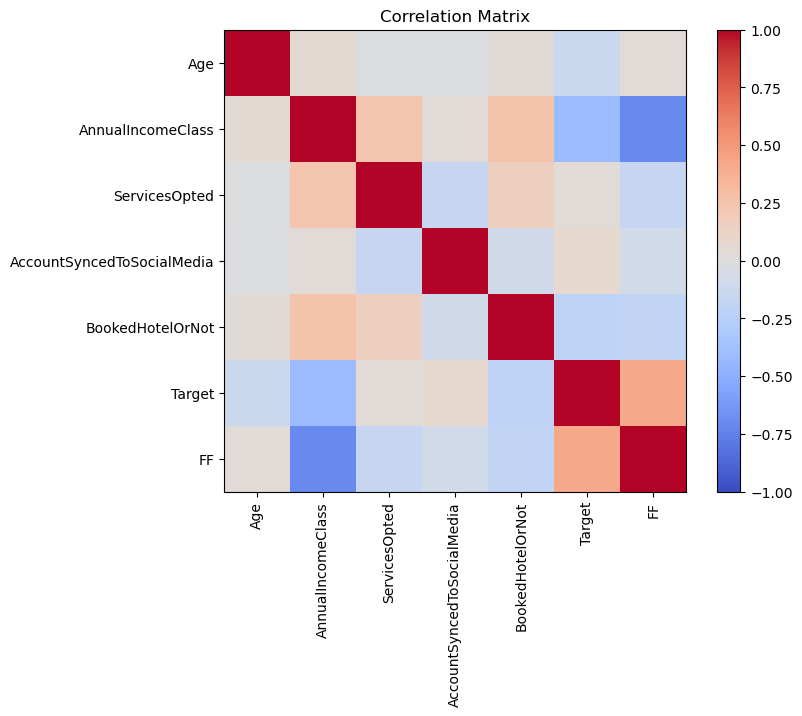

In [28]:
correlation_matrix = travel_df.corr()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap using the correlation matrix
heatmap = ax.imshow(correlation_matrix, cmap='coolwarm',vmin=-1,vmax=1)

# Set the x-axis and y-axis labels
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

# Add a colorbar legend
cbar = plt.colorbar(heatmap)

# Set the title
ax.set_title('Correlation Matrix')

# Display the plot
plt.show()

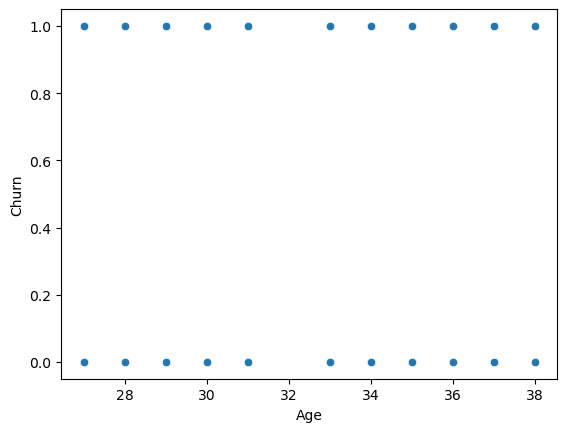

In [29]:
sns.scatterplot(y='Target',x='Age',data=df)
plt.ylabel('Churn')
plt.xlabel('Age')
plt.show()

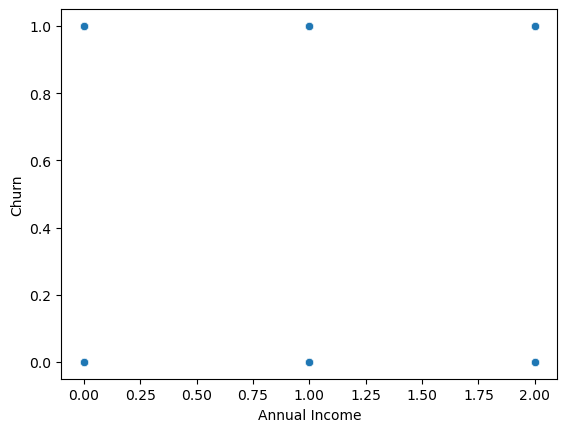

In [45]:
sns.scatterplot(y='Target',x='AnnualIncomeClass',data=df)
plt.ylabel('Churn')
plt.xlabel('Annual Income')
plt.show()

<AxesSubplot:xlabel='AnnualIncomeClass', ylabel='count'>

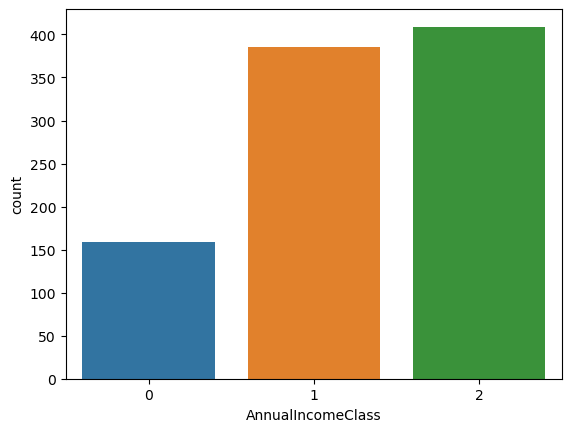

In [32]:
sns.countplot(x='AnnualIncomeClass',data=df)

<AxesSubplot:xlabel='Target', ylabel='count'>

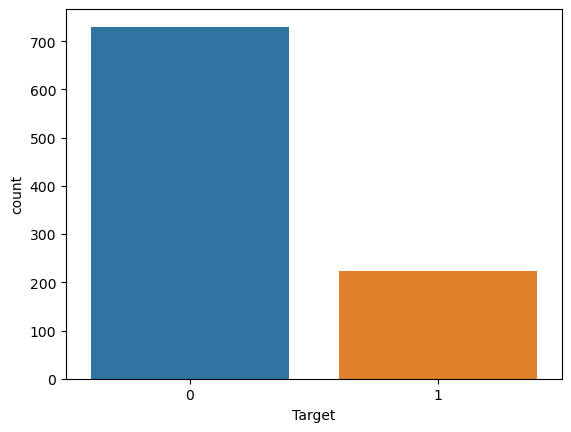

In [33]:
sns.countplot(x='Target',data=df)

<AxesSubplot:xlabel='Target', ylabel='Age'>

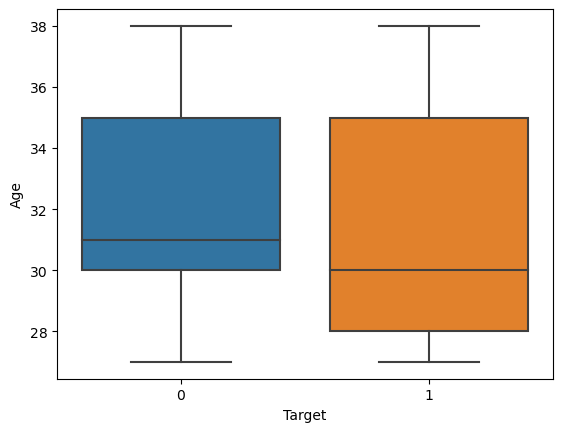

In [36]:
sns.boxplot(x='Target',y='Age',data=df)

### Decision Tree Model for Prediction

In [37]:
# Import liabrary for decision tree and precision score for evaluating the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

In [38]:
dt=DecisionTreeClassifier()


In [39]:
from sklearn.model_selection import train_test_split

In [41]:
# Split the data into training and testing datasets
X=df[['Age', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'FF']]
y=df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [42]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
pred=dt.predict(X_test)

In [44]:
f1_score(y_test,pred)

0.6666666666666667

In [46]:
recall_score(y_test,pred)

0.6153846153846154

In [47]:
precision_score(y_test,pred)

0.7272727272727273